In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import string
# from kmodes.kmodes import KModes
%matplotlib inline

In [13]:
data = pd.read_parquet("../data/tables/tbl_merchants.parquet")

# Remove revenue level and take rate
data['tags']= data['tags'].str[0:-25]

In [14]:
STOPWORDS = set(stopwords.words('english'))

# Function for preprocessing tags text
def preprocess_text(x):
    
    # Lower case and remove all punctutations
    x = x.lower()
    x = x.translate(str.maketrans('', '', string.punctuation))

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    x = " ".join(lemmatizer.lemmatize(word) for word in x.split())

    # Remove stop words
    x =  ' '.join([word for word in x.split() if word not in STOPWORDS])
    return x

In [15]:
data['tags_clean'] = data['tags'].map(preprocess_text)
data

,name,tags,tags_clean
merchant_abn,,,
10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...",furniture home furnishing equipment shop manuf...
10142254217,Arcu Ac Orci Corporation,"([cable, satellite, and otHer pay television a...",cable satellite pay television radio service
10165489824,Nunc Sed Company,"([jewelry, watch, clock, and silverware shops]",jewelry watch clock silverware shop
10187291046,Ultricies Dignissim Lacus Foundation,"([wAtch, clock, and jewelry repair shops]",watch clock jewelry repair shop
10192359162,Enim Condimentum PC,"([music shops - musical instruments, pianos, a...",music shop musical instrument piano sheet music
...,...,...,...
99938978285,Elit Dictum Eu Ltd,"[(opticians, optical goods, and eyeglasses)",optician optical good eyeglass
99974311662,Mollis LLP,"((books, periodicals, and newspapers)",book periodical newspaper
99976658299,Sociosqu Corp.,((shoe shops),shoe shop


In [16]:
# One Hot Encode tags
count_vectorizer = CountVectorizer(binary=True)
datavec  = count_vectorizer.fit_transform(data['tags_clean'])
count_array = datavec.toarray()
df = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())

# sns.pairplot(df)
name = count_vectorizer.get_feature_names()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
df

,al,antique,appliance,art,artist,awning,beauty,bicycle,book,cable,...,supply,system,telecom,television,tent,tool,toy,vehicle,watch,writing
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4022,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [18]:
# list of tags
km = KMeans(n_clusters=5, random_state=0)
df_clust = km.fit_transform(df)
clusters = km.fit_predict(df)

In [19]:
n_clusters = [3,4,5]

for n in n_clusters:
    # fit K-Means clustering with different number of clusters
    km = KMeans(n_clusters=n, random_state=0)
    km.fit_predict(df)
    
    # evaluate silhouette score of each model
    score = silhouette_score(df, km.labels_, metric='euclidean')
    print(f'Silhouette score for {n} clusters: {score:.3f}')

Silhouette score for 3 clusters: 0.172
Silhouette score for 4 clusters: 0.216
Silhouette score for 5 clusters: 0.262


In [26]:
data['clusters'] = km.labels_
print(data[data['clusters'] == 4])



                                              name  \
merchant_abn                                         
10165489824                       Nunc Sed Company   
10187291046   Ultricies Dignissim Lacus Foundation   
10192359162                    Enim Condimentum PC   
10206519221                          Fusce Company   
10264435225                       Ipsum Primis Ltd   
...                                            ...   
99786288465            Non Enim Commodo Industries   
99801770627                     Cras Convallis Ltd   
99802335254                    Ultrices Associates   
99845294286                Risus Nunc Ac Institute   
99976658299                         Sociosqu Corp.   

                                                           tags  \
merchant_abn                                                      
10165489824      ([jewelry, watch, clock, and silverware shops]   
10187291046           ([wAtch, clock, and jewelry repair shops]   
10192359162   ([music shops -

In [21]:
cluster_mapping = {0: 'Gardening', 1: 'Appliances', 2: 'Furnitures', 3: 'IT service', 4: 'Accessories'}
data['merchant_segments'] = data['clusters'].map(cluster_mapping)



In [22]:
data

,name,tags,tags_clean,clusters,merchant_segments
merchant_abn,,,,,
10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...",furniture home furnishing equipment shop manuf...,2,Furnitures
10142254217,Arcu Ac Orci Corporation,"([cable, satellite, and otHer pay television a...",cable satellite pay television radio service,1,Appliances
10165489824,Nunc Sed Company,"([jewelry, watch, clock, and silverware shops]",jewelry watch clock silverware shop,4,Accessories
10187291046,Ultricies Dignissim Lacus Foundation,"([wAtch, clock, and jewelry repair shops]",watch clock jewelry repair shop,4,Accessories
10192359162,Enim Condimentum PC,"([music shops - musical instruments, pianos, a...",music shop musical instrument piano sheet music,4,Accessories
...,...,...,...,...,...
99938978285,Elit Dictum Eu Ltd,"[(opticians, optical goods, and eyeglasses)",optician optical good eyeglass,1,Appliances
99974311662,Mollis LLP,"((books, periodicals, and newspapers)",book periodical newspaper,1,Appliances
99976658299,Sociosqu Corp.,((shoe shops),shoe shop,4,Accessories


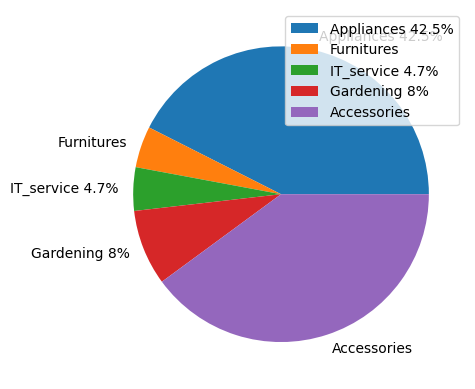

182

<Figure size 640x480 with 0 Axes>

In [42]:
# plot the percentage of merchants from our clients from each segment

Gardening_num = len(data[data['clusters'] == 0])
Appliances_num = len(data[data['clusters'] == 1])
Furnitures_num = len(data[data['clusters'] == 2])
IT_service_num = len(data[data['clusters'] == 3])
Accessories_num = len(data[data['clusters'] == 4])

segment_label = ["Appliances 42.5%", "Furnitures 4.5%", "IT_service 4.7%", "Gardening 8.3%", "Accessories 40%"]

y = np.array([ Appliances_num, Furnitures_num, IT_service_num, Gardening_num, Accessories_num])

plt.pie(y, labels=segment_label)
plt.legend()
plt.show() 
plt.savefig('../plots/precentage_segment.jpg')
Furnitures_num